In [1]:
# Make you have Scikit-Learn 1.1.1
import sklearn
assert sklearn.__version__ >= '1.1'

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import image as img
import cv2 as cv
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score, train_test_split, cross_validate
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

# Loading and cleaning data

In [3]:
boards_df = pd.read_csv('./raw_data/boards_df.csv',index_col=0)
boards_df

Title         Company  \
0      Skate Mental / AlienVs Predator Night    Skate Mental   
1        Skate / Mental Vs Predator Day 8.28           Skate   
2          Alien Workshop / Debut Decks Blue  Alien Workshop   
3            Antihero / Classic Eagle Orange        Antihero   
4            Antihero / Classic Eagle Larger        Antihero   
...                                      ...             ...   
2329                  Death / Og Skull Black           Death   
2330                  Death / Og Skull White           Death   
2331     Antihero / Shaped Eagle Green Giant        Antihero   
2332     Antihero / Shaped Eagle Blue Meanie        Antihero   
2333          Antihero / Classic Eagle Green        Antihero   

                                        Image_hyperlink Artist  Year  \
0     https://www.deckslog.com/wp-content/uploads/20...    NaN   NaN   
1     https://www.deckslog.com/wp-content/uploads/20...    NaN   NaN   
2     https://www.deckslog.com/wp-content/uploads/20...    NaN   NaN   
3     https://www.deckslog.com/wp-content/uploads/20...    NaN   NaN   
4     https://www.deckslog.com/wp-content/uploads/20...    NaN   NaN   
...                                                 ...    ...   ...   
2329  https://www.deckslog.com/wp-content/uploads/20...    NaN   NaN   
2330  https://www.deckslog.com/wp-content/uploads/20...    NaN   NaN   
2331  https://www.deckslog.com/wp-content/uploads/20...    NaN   NaN   
2332  https://www.deckslog.com/wp-content/uploads/20...    NaN   NaN   
2333  https://www.deckslog.com/wp-content/uploads/20...    NaN   NaN   

                                             Image_path  
0     /Users/etiennelanzeray/code/EtiNL/Sk8_decks_pr...  
1     /Users/etiennelanzeray/code/EtiNL/Sk8_decks_pr...  
2     /Users/etiennelanzeray/code/EtiNL/Sk8_decks_pr...  
3     /Users/etiennelanzeray/code/EtiNL/Sk8_decks_pr...  
4     /Users/etiennelanzeray/code/EtiNL/Sk8_decks_pr...  
...                                                 ...  
2329  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_pr...  
2330  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_pr...  
2331  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_pr...  
2332  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_pr...  
2333  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_pr...  

[2334 rows x 6 columns]

<AxesSubplot: xlabel='Company'>

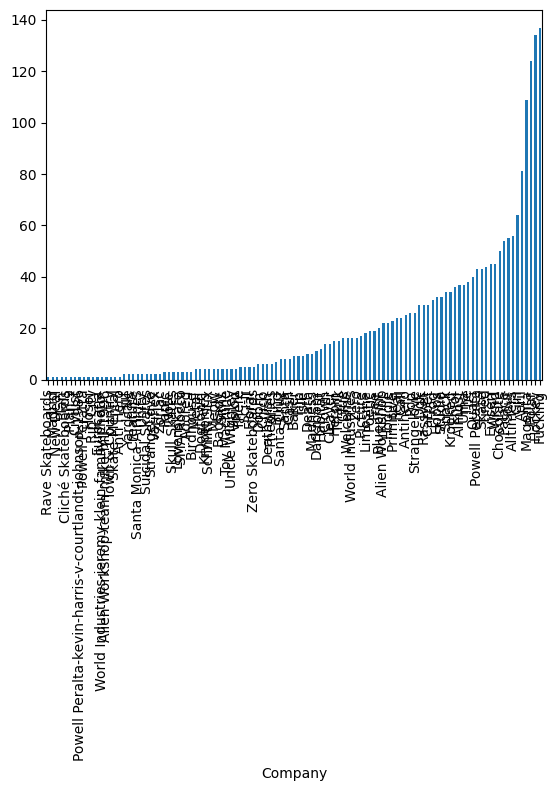

In [4]:
boards_df.groupby("Company").count().sort_values(by=["Title"])["Title"].plot(kind="bar")

On va seulement s'intéresser aux marques représentées par plus de 60 decks

In [5]:
(boards_df.groupby("Company").count()>=60)[['Title']]

Title
Company                                           
Adored                                       False
Alien Workshop                               False
Alien Workshop-team-mike-hill-1996           False
Alltimers                                    False
Almost                                       False
...                                            ...
World Industries-jeremy-klein-family-photo-  False
Yardsale                                     False
Zero                                         False
Zero Skateboards                             False
Zorlac                                       False

[111 rows x 1 columns]

In [6]:
boards_df.groupby("Company").count()['Title'][(boards_df.groupby("Company").count()>=60)['Title']]

Company
April       81
Fucking    137
Girl        64
Hockey     134
Magenta    109
Polar      124
Name: Title, dtype: int64

In [7]:
boards_df.query('Company in ["April","Fucking","Girl","Hockey","Magenta","Polar"]')

Title  Company  \
205                               Girl / Guy Mariano     Girl   
222                     Girl / Tyler Pacheco Birdman     Girl   
223         Girl / Rick Howard Best Of Both Loveseat     Girl   
224                    Girl / Rick Mccrank Bar Blues     Girl   
225                   Girl / Niels Bennett Bar Blues     Girl   
...                                              ...      ...   
2257   Fucking / Awesome Sean Pablo Angel Burn Black  Fucking   
2258      Fucking / Awesome Tiger Holographic Yellow  Fucking   
2297                   Hockey / Donovon Piscopo Dawn   Hockey   
2314                           Polar / No Comply Red    Polar   
2322                     Polar / Shin Sanbongi Queen    Polar   

                                        Image_hyperlink         Artist  \
205   https://www.deckslog.com/wp-content/uploads/20...  Pawel Swanski   
222   https://www.deckslog.com/wp-content/uploads/20...            NaN   
223   https://www.deckslog.com/wp-content/uploads/20...            NaN   
224   https://www.deckslog.com/wp-content/uploads/20...            NaN   
225   https://www.deckslog.com/wp-content/uploads/20...            NaN   
...                                                 ...            ...   
2257  https://www.deckslog.com/wp-content/uploads/20...            NaN   
2258  https://www.deckslog.com/wp-content/uploads/20...            NaN   
2297  https://www.deckslog.com/wp-content/uploads/20...            NaN   
2314  https://www.deckslog.com/wp-content/uploads/20...            NaN   
2322  https://www.deckslog.com/wp-content/uploads/20...            NaN   

        Year                                         Image_path  
205   2013.0  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_pr...  
222      NaN  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_pr...  
223      NaN  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_pr...  
224      NaN  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_pr...  
225      NaN  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_pr...  
...      ...                                                ...  
2257     NaN  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_pr...  
2258     NaN  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_pr...  
2297     NaN  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_pr...  
2314     NaN  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_pr...  
2322     NaN  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_pr...  

[649 rows x 6 columns]

In [8]:
Company_recognition_df = boards_df.query('Company in ["April","Fucking","Girl","Hockey","Magenta","Polar"]')[['Company','Image_path']].reset_index(drop=True)
Company_recognition_df.head()

Company                                         Image_path
0    Girl  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_pr...
1    Girl  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_pr...
2    Girl  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_pr...
3    Girl  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_pr...
4    Girl  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_pr...

We need to shuffle the dataset

In [9]:
Company_recognition_df = Company_recognition_df.sample(frac=1).reset_index(drop=True)
Company_recognition_df.head()

Company                                         Image_path
0     Girl  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_pr...
1    April  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_pr...
2   Hockey  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_pr...
3  Magenta  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_pr...
4    April  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_pr...

In [10]:
Company_recognition_df.describe()

Company                                         Image_path
count       649                                                649
unique        6                                                649
top     Fucking  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_pr...
freq        137                                                  1

In [11]:
Company_recognition_df.shape

(649, 2)

Comme on peut le voir chaque board de notre dataset possède une image

uint8
(1000, 1000, 3)


([], [])

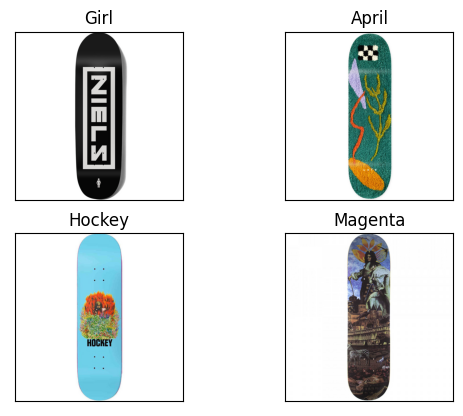

In [12]:
# load image as pixel array
image_0, image_1, image_2, image_3 = img.imread(Company_recognition_df['Image_path'][0]),img.imread(Company_recognition_df['Image_path'][1]),img.imread(Company_recognition_df['Image_path'][2]),img.imread(Company_recognition_df['Image_path'][3])
# summarize shape of the pixel array
print(image_0.dtype)
print(image_0.shape)
# display the array of pixels as an image
plt.subplot(2,2,1)
plt.imshow(image_0)
plt.title(Company_recognition_df['Company'][0])
plt.xticks(())
plt.yticks(())

plt.subplot(2,2,2)
plt.imshow(image_1)
plt.title(Company_recognition_df['Company'][1])
plt.xticks(())
plt.yticks(())

plt.subplot(2,2,3)
plt.imshow(image_2)
plt.title(Company_recognition_df['Company'][2])
plt.xticks(())
plt.yticks(())

plt.subplot(2,2,4)
plt.imshow(image_3)
plt.title(Company_recognition_df['Company'][3])
plt.xticks(())
plt.yticks(())

Le PCA fonctionne en niveau de gris donc nous allons convertir les images en gris

uint8
(1000, 1000)


([], [])

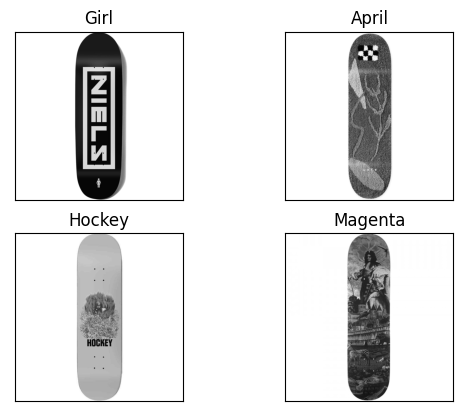

In [25]:
image_0, image_1, image_2, image_3 = cv.imread(Company_recognition_df['Image_path'][0],0),cv.imread(Company_recognition_df['Image_path'][1],0),cv.imread(Company_recognition_df['Image_path'][2],0),cv.imread(Company_recognition_df['Image_path'][3],0)
# summarize shape of the pixel array
print(image_0.dtype)
print(image_0.shape)
# display the array of pixels as an image
plt.subplot(2,2,1)
plt.imshow(image_0,cmap='gray')
plt.title(Company_recognition_df['Company'][0])
plt.xticks(())
plt.yticks(())

plt.subplot(2,2,2)
plt.imshow(image_1,cmap='gray')
plt.title(Company_recognition_df['Company'][1])
plt.xticks(())
plt.yticks(())

plt.subplot(2,2,3)
plt.imshow(image_2,cmap='gray')
plt.title(Company_recognition_df['Company'][2])
plt.xticks(())
plt.yticks(())

plt.subplot(2,2,4)
plt.imshow(image_3,cmap='gray')
plt.title(Company_recognition_df['Company'][3])
plt.xticks(())
plt.yticks(())

In [ ]:
X=pd.DataFrame()
for image_path in Company_recognition_df['Image_path']:
    cv.imread(Company_recognition_df['Image_path'][0],0)